2016년부터 20년까지 데이터를 쌓아보자.

In [1]:
import pandas as pd

In [2]:
year = [16,17,18,19,20]
for i in year:
    globals()['df_raw{}'.format(i)] = pd.read_csv("datasets/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_20{}.csv".format(i))

In [3]:
def col_name_kr(df):
    df.rename(columns={'G_ID':'게임키'}, inplace =True)
    df.rename(columns={'GDAY_DS':'일자'}, inplace =True)
    df.rename(columns={'T_ID':'팀코드'}, inplace =True)
    df.rename(columns={'VS_T_ID':'상대팀코드'}, inplace =True)
    df.rename(columns={'HEADER_NO':'더블헤더코드'}, inplace =True)
    df.rename(columns={'TB_SC' :'초말'}, inplace =True)
    df.rename(columns={'PA':'타자'}, inplace =True)
    df.rename(columns={'AB':'타수'}, inplace =True)
    df.rename(columns={'RBI':'타점'}, inplace =True)
    df.rename(columns={'RUN':'득점'}, inplace =True)
    df.rename(columns={'HIT':'안타'}, inplace =True)
    df.rename(columns={'H2':'2루타'}, inplace =True)
    df.rename(columns={'H3':'3루타'}, inplace =True)
    df.rename(columns={'HR':'홈런'}, inplace =True)
    df.rename(columns={'SB':'도루'}, inplace =True)
    df.rename(columns={'CS':'도루실패'}, inplace =True)
    df.rename(columns={'SH' :'희생타'}, inplace =True)
    df.rename(columns={'SF':'희생플라이'}, inplace =True)
    df.rename(columns={'BB':'4구'}, inplace =True)
    df.rename(columns={'IB':'고4'}, inplace =True)
    df.rename(columns={'HP':'사구'}, inplace =True)
    df.rename(columns={'KK':'삼진'}, inplace =True)
    df.rename(columns={'GD':'병살타'}, inplace =True)
    df.rename(columns={'ERR':'실책'}, inplace =True)
    df.rename(columns={'LOB':'잔루'}, inplace =True)
    df.rename(columns={'P_HRA_RT':'득점권타율'}, inplace =True)
    df.rename(columns={'P_AB_CN':'득점권타수'}, inplace =True)
    df.rename(columns={'P_HIT_CN' :'득점권안타'}, inplace =True)
    
def avg(df):
    df['1루타'] = df['안타'] - df['2루타']- df['3루타'] - df['홈런']
    df['타율'] = df['안타']/df['타수']
    df['득점권타율'] = df['득점권안타']/df['득점권타수']
    

def accum_bat(df):
    df_mod = df.loc[:,'타자':]
    df_accum = []
    col = df.columns[6:]
    for i in range(len(df_mod)):
        if i == 0:
            df_accum.append(df_mod.values[i])
        else:
            df_accum.append(df_accum[i-1] + df_mod.values[i])
    df_accum = pd.DataFrame(df_accum, columns=col)
    
    #타율 드랍
    df_accum = df_accum.drop('득점권타율', axis=1)
    return df_accum

def date(df,df_new):
    #일자 컬럼 추가
    ser_date = pd.to_datetime(df['일자'], format='%Y%m%d',errors='ignore')
    ser_date_mod = ser_date.reset_index()
    df_new['일자']=ser_date_mod['일자']

def team_sep(df,team):
    df_new =df[df['팀코드']==team]
    return df_new

def per_fit(df):
    #타자부터 득점권안타까지 경기당 기록으로 change
    for i in range(len(df)):
        df.loc[i,:'득점권안타'] = df.loc[i,:'득점권안타']/(i+1)

def scale(df):
    from sklearn.preprocessing import MinMaxScaler
    scale_cols = list(df.columns[:-3])
    scaler = MinMaxScaler()
    scaled_df = scaler.fit_transform(df[scale_cols])
    df[scale_cols] = scaled_df
    #일자, 타율, 득점권 타율 제외

함수 사용순서(예시, 더 정확한 것은 RNN타율.ipynb를 볼 것)
- col_name_kr(df_raw)
- df_LG = team_sep(df_raw,'LG')
- LG_accum = accum_bat(df_LG)
- avg(LG_accum)
- date(df_LG,LG_accum)
- per_fit(LG_accum)
- scale(LG_accum)

In [4]:
for i in year:
    col_name_kr(globals()['df_raw{}'.format(i)])

위 코드는 아래 코드와 같다.
- col_name_kr(df_raw16)
- col_name_kr(df_raw17)
- col_name_kr(df_raw18)
- col_name_kr(df_raw19)
- col_name_kr(df_raw20)

In [5]:
team = list(df_raw16['팀코드'][:10])

In [6]:
for i in year:
    for j in team:
        globals()['df_{0}{1}'.format(j,i)] = team_sep(globals()['df_raw{}'.format(i)],j)

#위 코드는 다음 50줄 코드와 같은 일을 한다.
df_LG16 = team_sep(df_raw16,'LG')
df_HH16 = team_sep(df_raw16,'HH')
df_NC16 = team_sep(df_raw16,'NC')
df_HT16 = team_sep(df_raw16,'HT')
df_SK16 = team_sep(df_raw16,'SK')
df_KT16 = team_sep(df_raw16,'KT')
df_WO16 = team_sep(df_raw16,'WO')
df_LT16 = team_sep(df_raw16,'LT')
df_SS16 = team_sep(df_raw16,'SS')
df_OB16 = team_sep(df_raw16,'OB')

df_LG17 = team_sep(df_raw17,'LG')
df_HH17 = team_sep(df_raw17,'HH')
df_NC17 = team_sep(df_raw17,'NC')
df_HT17 = team_sep(df_raw17,'HT')
df_SK17 = team_sep(df_raw17,'SK')
df_KT17 = team_sep(df_raw17,'KT')
df_WO17 = team_sep(df_raw17,'WO')
df_LT17 = team_sep(df_raw17,'LT')
df_SS17 = team_sep(df_raw17,'SS')
df_OB17 = team_sep(df_raw17,'OB')

df_LG18 = team_sep(df_raw18,'LG')
df_HH18 = team_sep(df_raw18,'HH')
df_NC18 = team_sep(df_raw18,'NC')
df_HT18 = team_sep(df_raw18,'HT')
df_SK18 = team_sep(df_raw18,'SK')
df_KT18 = team_sep(df_raw18,'KT')
df_WO18 = team_sep(df_raw18,'WO')
df_LT18 = team_sep(df_raw18,'LT')
df_SS18 = team_sep(df_raw18,'SS')
df_OB18 = team_sep(df_raw18,'OB')

df_LG19 = team_sep(df_raw19,'LG')
df_HH19 = team_sep(df_raw19,'HH')
df_NC19 = team_sep(df_raw19,'NC')
df_HT19 = team_sep(df_raw19,'HT')
df_SK19 = team_sep(df_raw19,'SK')
df_KT19 = team_sep(df_raw19,'KT')
df_WO19 = team_sep(df_raw19,'WO')
df_LT19 = team_sep(df_raw19,'LT')
df_SS19 = team_sep(df_raw19,'SS')
df_OB19 = team_sep(df_raw19,'OB')

df_LG20 = team_sep(df_raw20,'LG')
df_HH20 = team_sep(df_raw20,'HH')
df_NC20 = team_sep(df_raw20,'NC')
df_HT20 = team_sep(df_raw20,'HT')
df_SK20 = team_sep(df_raw20,'SK')
df_KT20 = team_sep(df_raw20,'KT')
df_WO20 = team_sep(df_raw20,'WO')
df_LT20 = team_sep(df_raw20,'LT')
df_SS20 = team_sep(df_raw20,'SS')
df_OB20 = team_sep(df_raw20,'OB')

In [7]:
for i in year:
    for j in team:
        globals()['{0}_accum{1}'.format(j,i)] = accum_bat(globals()['df_{0}{1}'.format(j,i)])

In [8]:
HH_accum17

,타자,타수,타점,득점,안타,2루타,3루타,홈런,도루,도루실패,...,희생플라이,4구,고4,사구,삼진,병살타,실책,잔루,득점권타수,득점권안타
0,33.0,29.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,8.0,0.0,4.0,6.0,4.0,0.0
1,87.0,73.0,6.0,6.0,20.0,2.0,0.0,1.0,0.0,1.0,...,0.0,9.0,1.0,0.0,16.0,0.0,5.0,21.0,24.0,3.0
2,141.0,117.0,10.0,10.0,28.0,3.0,1.0,2.0,2.0,1.0,...,0.0,16.0,1.0,3.0,25.0,0.0,7.0,35.0,35.0,5.0
3,178.0,148.0,16.0,16.0,38.0,6.0,1.0,3.0,2.0,2.0,...,0.0,18.0,1.0,5.0,30.0,2.0,8.0,42.0,47.0,8.0
4,215.0,182.0,18.0,18.0,46.0,7.0,1.0,4.0,2.0,2.0,...,0.0,19.0,1.0,7.0,37.0,4.0,9.0,50.0,54.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,5498.0,4877.0,670.0,722.0,1405.0,258.0,15.0,144.0,64.0,44.0,...,37.0,405.0,14.0,92.0,945.0,108.0,77.0,1043.0,1271.0,374.0
140,5534.0,4911.0,672.0,724.0,1413.0,258.0,16.0,146.0,64.0,44.0,...,37.0,406.0,14.0,93.0,955.0,109.0,78.0,1050.0,1277.0,374.0
141,5571.0,4943.0,672.0,725.0,1421.0,259.0,16.0,146.0,64.0,44.0,...,37.0,410.0,14.0,94.0,964.0,112.0,80.0,1059.0,1284.0,374.0
142,5610.0,4978.0,676.0,729.0,1430.0,259.0,16.0,148.0,64.0,44.0,...,38.0,413.0,14.0,94.0,968.0,112.0,80.0,1067.0,1289.0,374.0


In [9]:
for i in year:
    for j in team:
        avg(globals()['{0}_accum{1}'.format(j,i)]) 

In [10]:
HH_accum17

,타자,타수,타점,득점,안타,2루타,3루타,홈런,도루,도루실패,...,사구,삼진,병살타,실책,잔루,득점권타수,득점권안타,1루타,타율,득점권타율
0,33.0,29.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,...,0.0,8.0,0.0,4.0,6.0,4.0,0.0,4.0,0.137931,0.000000
1,87.0,73.0,6.0,6.0,20.0,2.0,0.0,1.0,0.0,1.0,...,0.0,16.0,0.0,5.0,21.0,24.0,3.0,17.0,0.273973,0.125000
2,141.0,117.0,10.0,10.0,28.0,3.0,1.0,2.0,2.0,1.0,...,3.0,25.0,0.0,7.0,35.0,35.0,5.0,22.0,0.239316,0.142857
3,178.0,148.0,16.0,16.0,38.0,6.0,1.0,3.0,2.0,2.0,...,5.0,30.0,2.0,8.0,42.0,47.0,8.0,28.0,0.256757,0.170213
4,215.0,182.0,18.0,18.0,46.0,7.0,1.0,4.0,2.0,2.0,...,7.0,37.0,4.0,9.0,50.0,54.0,9.0,34.0,0.252747,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,5498.0,4877.0,670.0,722.0,1405.0,258.0,15.0,144.0,64.0,44.0,...,92.0,945.0,108.0,77.0,1043.0,1271.0,374.0,988.0,0.288087,0.294256
140,5534.0,4911.0,672.0,724.0,1413.0,258.0,16.0,146.0,64.0,44.0,...,93.0,955.0,109.0,78.0,1050.0,1277.0,374.0,993.0,0.287721,0.292874
141,5571.0,4943.0,672.0,725.0,1421.0,259.0,16.0,146.0,64.0,44.0,...,94.0,964.0,112.0,80.0,1059.0,1284.0,374.0,1000.0,0.287477,0.291277
142,5610.0,4978.0,676.0,729.0,1430.0,259.0,16.0,148.0,64.0,44.0,...,94.0,968.0,112.0,80.0,1067.0,1289.0,374.0,1007.0,0.287264,0.290147


In [11]:
for i in year:
    for j in team:
        date(globals()['df_{0}{1}'.format(j,i)],globals()['{0}_accum{1}'.format(j,i)])

In [12]:
HH_accum17

,타자,타수,타점,득점,안타,2루타,3루타,홈런,도루,도루실패,...,삼진,병살타,실책,잔루,득점권타수,득점권안타,1루타,타율,득점권타율,일자
0,33.0,29.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,...,8.0,0.0,4.0,6.0,4.0,0.0,4.0,0.137931,0.000000,2017-03-31
1,87.0,73.0,6.0,6.0,20.0,2.0,0.0,1.0,0.0,1.0,...,16.0,0.0,5.0,21.0,24.0,3.0,17.0,0.273973,0.125000,2017-04-01
2,141.0,117.0,10.0,10.0,28.0,3.0,1.0,2.0,2.0,1.0,...,25.0,0.0,7.0,35.0,35.0,5.0,22.0,0.239316,0.142857,2017-04-02
3,178.0,148.0,16.0,16.0,38.0,6.0,1.0,3.0,2.0,2.0,...,30.0,2.0,8.0,42.0,47.0,8.0,28.0,0.256757,0.170213,2017-04-04
4,215.0,182.0,18.0,18.0,46.0,7.0,1.0,4.0,2.0,2.0,...,37.0,4.0,9.0,50.0,54.0,9.0,34.0,0.252747,0.166667,2017-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,5498.0,4877.0,670.0,722.0,1405.0,258.0,15.0,144.0,64.0,44.0,...,945.0,108.0,77.0,1043.0,1271.0,374.0,988.0,0.288087,0.294256,2017-09-28
140,5534.0,4911.0,672.0,724.0,1413.0,258.0,16.0,146.0,64.0,44.0,...,955.0,109.0,78.0,1050.0,1277.0,374.0,993.0,0.287721,0.292874,2017-09-29
141,5571.0,4943.0,672.0,725.0,1421.0,259.0,16.0,146.0,64.0,44.0,...,964.0,112.0,80.0,1059.0,1284.0,374.0,1000.0,0.287477,0.291277,2017-09-30
142,5610.0,4978.0,676.0,729.0,1430.0,259.0,16.0,148.0,64.0,44.0,...,968.0,112.0,80.0,1067.0,1289.0,374.0,1007.0,0.287264,0.290147,2017-10-01


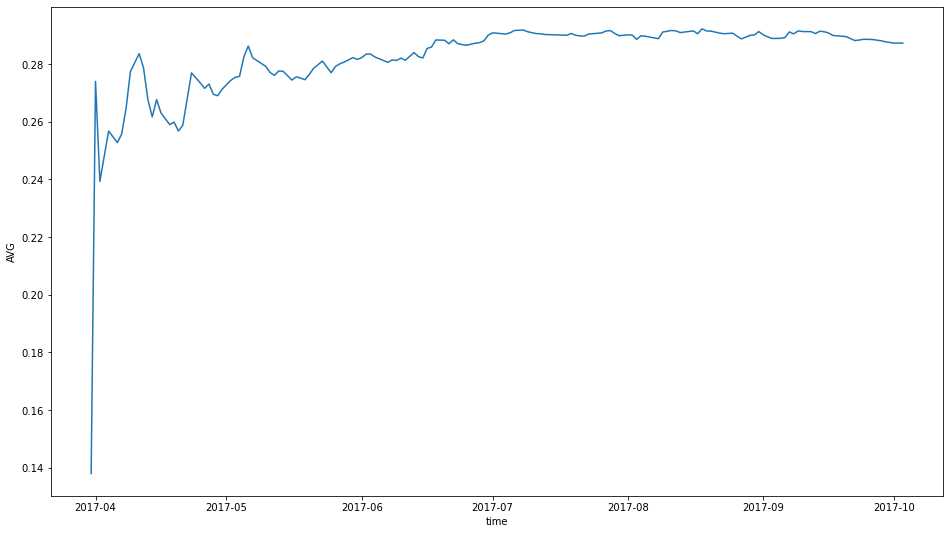

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,9))
sns.lineplot( x=HH_accum17['일자'], y=HH_accum17['타율'])
plt.xlabel('time')
plt.ylabel('AVG')
plt.show()

In [14]:
for i in year:
    for j in team:
        per_fit(globals()['{0}_accum{1}'.format(j,i)])
        scale(globals()['{0}_accum{1}'.format(j,i)])

먼저 시즌 데이터로 병합

In [17]:
for i in year:
    for j in team:
        if j == 'LG':
            pass
        elif j == 'HH':   
            globals()['df_{}'.format(i)] = pd.concat([globals()['{0}_accum{1}'.format(j,i)],
                                                             globals()['{0}_accum{1}'.format('LG',i)]])
        else:
            globals()['df_{}'.format(i)] = pd.concat([globals()['df_{}'.format(i)],globals()['{0}_accum{1}'.format(j,i)]])

In [18]:
df_16

,타자,타수,타점,득점,안타,2루타,3루타,홈런,도루,도루실패,...,삼진,병살타,실책,잔루,득점권타수,득점권안타,1루타,타율,득점권타율,일자
0,1.000000,1.000000,0.243243,0.138462,1.000000,0.277778,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.520000,1.000000,1.000000,1.000000,0.363636,0.000000,0.282609,0.200000,2016-04-01
1,0.922018,0.874598,0.729730,0.623077,1.000000,0.819444,0.000000,0.000000,0.000000,1.000000,...,0.866667,0.000000,0.625000,0.770270,1.000000,0.745455,0.008523,0.292135,0.266667,2016-04-02
2,0.662080,0.609861,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.572917,0.666667,...,0.111111,0.173333,0.500000,0.540541,0.948250,1.000000,0.017045,0.314516,0.318182,2016-04-05
3,0.434633,0.477492,0.810811,0.784615,0.881119,0.954861,0.000000,0.478947,0.859375,0.500000,...,0.000000,0.260000,0.250000,0.253378,0.728311,0.745455,0.022727,0.314465,0.301887,2016-04-06
4,0.360550,0.464952,0.632432,0.590769,0.857343,0.819444,0.000000,0.766316,0.687500,0.400000,...,0.200000,0.104000,0.250000,0.310811,0.658447,0.592727,0.030303,0.313131,0.281250,2016-04-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.779429,0.911293,0.916194,0.899546,0.818484,0.654762,0.535714,0.392857,0.071429,0.034341,...,0.771429,0.608086,0.780827,0.779412,0.617460,0.890014,0.973161,0.298754,0.306063,2016-09-28
140,0.772340,0.908079,0.901810,0.884345,0.808917,0.650118,0.531915,0.391253,0.068558,0.031097,...,0.781915,0.610063,0.810004,0.780142,0.616233,0.880534,0.978131,0.297972,0.304064,2016-09-29
141,0.771549,0.908136,0.898815,0.880307,0.803754,0.650235,0.528169,0.389671,0.065728,0.027898,...,0.779930,0.599522,0.815789,0.780862,0.615023,0.880624,0.983101,0.297482,0.304254,2016-10-03
142,0.773846,0.912998,0.898639,0.879043,0.805023,0.655012,0.524476,0.388112,0.062937,0.024744,...,0.784965,0.601531,0.810085,0.781571,0.615385,0.883835,0.989066,0.297422,0.304939,2016-10-04


In [19]:
df_20

,타자,타수,타점,득점,안타,2루타,3루타,홈런,도루,도루실패,...,삼진,병살타,실책,잔루,득점권타수,득점권안타,1루타,타율,득점권타율,일자
0,0.000000,0.000000,0.333333,0.272727,0.600000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.187500,0.000000,0.000000,0.783439,0.600000,0.000000,0.258065,0.250000,2020-05-05
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.000000,0.750000,0.000000,0.366667,...,0.000000,0.187500,1.000000,0.278846,0.133758,0.000000,0.007833,0.209677,0.214286,2020-05-06
2,0.972222,0.727273,1.000000,1.000000,0.866667,0.259259,0.000000,0.500000,1.000000,0.155556,...,0.270627,1.000000,0.666667,0.557692,1.000000,1.000000,0.039164,0.262626,0.280000,2020-05-07
3,0.520833,0.545455,0.833333,0.818182,0.600000,0.027778,0.000000,0.750000,0.750000,0.366667,...,0.405941,0.796875,0.500000,0.139423,0.458599,0.600000,0.052219,0.246154,0.266667,2020-05-08
4,0.500000,0.581818,0.733333,0.709091,0.760000,0.111111,0.000000,0.900000,0.600000,0.493333,...,0.243564,0.675000,0.600000,0.223077,0.523567,0.600000,0.070496,0.257669,0.263158,2020-05-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.792214,0.696711,0.753191,0.708333,0.682031,0.571569,0.833333,0.259459,0.866667,0.280000,...,0.346429,0.462963,0.610606,0.984867,0.982000,0.918750,0.937247,0.302369,0.320786,2020-07-15
60,0.781142,0.689172,0.747122,0.702186,0.680072,0.583414,0.819672,0.243243,0.950820,0.298361,...,0.346604,0.444444,0.639344,0.979986,0.985574,0.917520,0.951417,0.302517,0.319422,2020-07-16
61,0.766659,0.679966,0.735072,0.690860,0.671371,0.563567,0.806452,0.227550,0.967742,0.293548,...,0.332949,0.462366,0.648094,0.958638,0.973548,0.907258,0.965587,0.301444,0.318979,2020-07-17
62,0.773027,0.672932,0.735562,0.690476,0.674107,0.564893,0.793651,0.212355,0.952381,0.311111,...,0.316327,0.479718,0.637807,0.976142,0.980952,0.919643,0.985830,0.302491,0.321373,2020-07-18


### data 저장

In [20]:
for i in year:
    globals()['df_{}'.format(i)].to_csv("./tbat/tbat_{0}.csv".format(i))

## 1과 다른 점 훈련을 모든팀 16-20시즌으로 하고 테스트를 20시즌데이터로 한정한다.

In [21]:
df=pd.concat([df_16,df_17,df_18,df_19])

###  훈련 데이터, 모델 설정

타율을 label로 설정

In [44]:
train = df[:]
test = HH_accum20[:]

In [27]:
# 데이터를 묶어서 처리하는 함수
def make_dateset(data, label, window_size=10):
    import numpy as np
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [28]:
feature_cols = df.columns[:-3]
label_cols = ['타율']

In [45]:
train_feature, train_label = make_dateset(train[feature_cols], train[label_cols],24)
test_feature, test_label = make_dateset(test[feature_cols], test[label_cols],24)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(
    train_feature, train_label, test_size=0.1)

In [31]:
x_train.shape, x_valid.shape, test_feature.shape

((5162, 24, 22), (574, 24, 22), (40, 24, 22))

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LSTM

In [36]:
model = Sequential()

In [37]:
model.add(LSTM(10, activation='relu',
              input_shape=(train_feature.shape[1], train_feature.shape[2])))
model.add(Dense(1))

In [38]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [40]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=16,
                validation_data=(x_valid, y_valid), callbacks=[early_stop])

Train on 5162 samples, validate on 574 samples
Epoch 1/200
5162/5162 [==============================] - 6s 1ms/sample - loss: 0.0055 - mae: 0.0457 - val_loss: 9.1937e-04 - val_mae: 0.0238
Epoch 2/200
5162/5162 [==============================] - 4s 859us/sample - loss: 6.2173e-04 - mae: 0.0190 - val_loss: 4.4870e-04 - val_mae: 0.0161
Epoch 3/200
5162/5162 [==============================] - 4s 853us/sample - loss: 3.9955e-04 - mae: 0.0147 - val_loss: 3.2271e-04 - val_mae: 0.0134
Epoch 4/200
5162/5162 [==============================] - 4s 822us/sample - loss: 3.1323e-04 - mae: 0.0126 - val_loss: 2.8913e-04 - val_mae: 0.0128
Epoch 5/200
5162/5162 [==============================] - 4s 826us/sample - loss: 2.7548e-04 - mae: 0.0116 - val_loss: 2.3331e-04 - val_mae: 0.0110
Epoch 6/200
5162/5162 [==============================] - 4s 828us/sample - loss: 2.4948e-04 - mae: 0.0108 - val_loss: 2.1727e-04 - val_mae: 0.0106
Epoch 7/200
5162/5162 [==============================] - 4s 851us/sample - lo

5162/5162 [==============================] - 4s 865us/sample - loss: 8.3960e-05 - mae: 0.0050 - val_loss: 6.9014e-05 - val_mae: 0.0050
Epoch 57/200
5162/5162 [==============================] - 5s 879us/sample - loss: 8.5717e-05 - mae: 0.0052 - val_loss: 8.7294e-05 - val_mae: 0.0056
Epoch 58/200
5162/5162 [==============================] - 5s 905us/sample - loss: 8.5084e-05 - mae: 0.0050 - val_loss: 7.7291e-05 - val_mae: 0.0050
Epoch 59/200
5162/5162 [==============================] - 4s 867us/sample - loss: 8.4040e-05 - mae: 0.0051 - val_loss: 6.5149e-05 - val_mae: 0.0049
Epoch 60/200
5162/5162 [==============================] - 5s 886us/sample - loss: 8.6231e-05 - mae: 0.0052 - val_loss: 7.6926e-05 - val_mae: 0.0053
Epoch 61/200
5162/5162 [==============================] - 4s 867us/sample - loss: 8.4812e-05 - mae: 0.0050 - val_loss: 6.7614e-05 - val_mae: 0.0048
Epoch 62/200
5162/5162 [==============================] - 5s 886us/sample - loss: 8.1220e-05 - mae: 0.0049 - val_loss: 7.1533

In [46]:
pred = model.predict(test_feature)

In [47]:
model.evaluate(test_feature, test_label)

41/41 [==============================] - 0s 340us/sample - loss: 1.1304e-04 - mae: 0.0085


[0.00011304284235825989, 0.008531532]

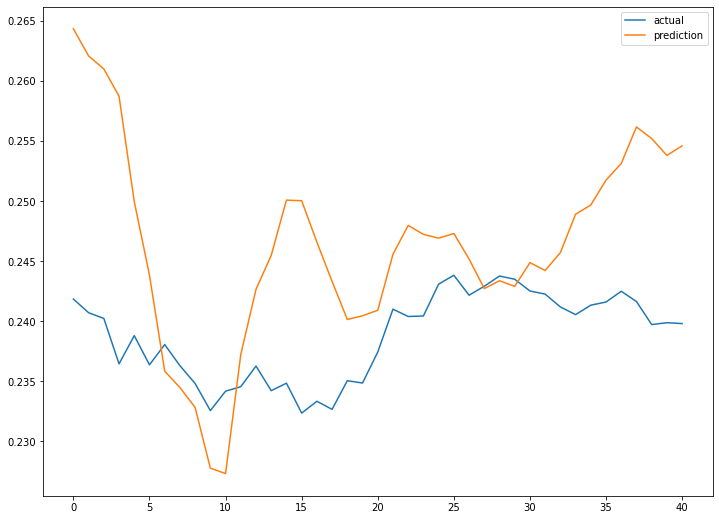

In [48]:
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

위 결과는 한화의 20시즌 데이터 MAE가 준수하다.

40/40 [==============================] - 0s 299us/sample - loss: 0.0010 - mae: 0.0308
[0.0010058007668703795, 0.03080293]


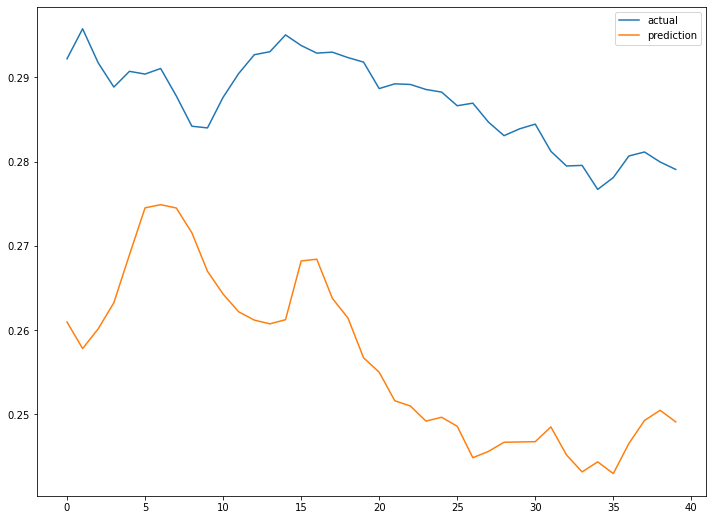

In [49]:
test = LG_accum20[:]
test_feature, test_label = make_dateset(test[feature_cols], test[label_cols],24)
a = model.evaluate(test_feature, test_label)
print(a)
pred = model.predict(test_feature)
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

39/39 [==============================] - 0s 230us/sample - loss: 7.8579e-05 - mae: 0.0086
[7.85785497357257e-05, 0.008599602]


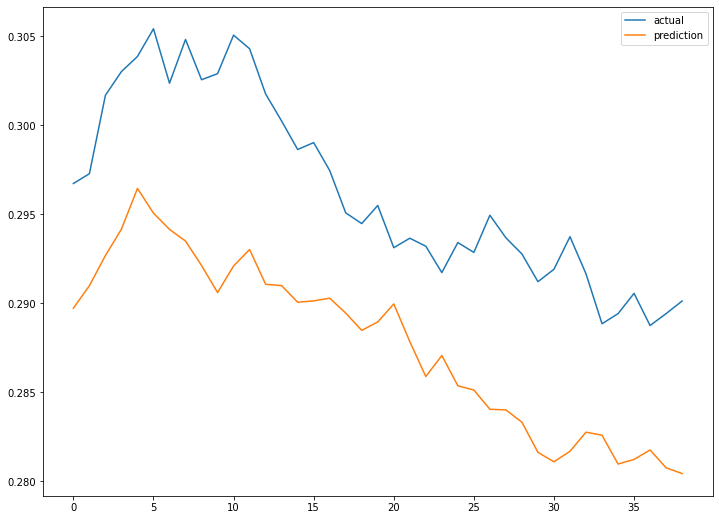

In [50]:
test = NC_accum20[:]
test_feature, test_label = make_dateset(test[feature_cols], test[label_cols],24)
a = model.evaluate(test_feature, test_label)
print(a)
pred = model.predict(test_feature)
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

38/38 [==============================] - 0s 263us/sample - loss: 6.4529e-04 - mae: 0.0250
[0.0006452850020171976, 0.02503604]


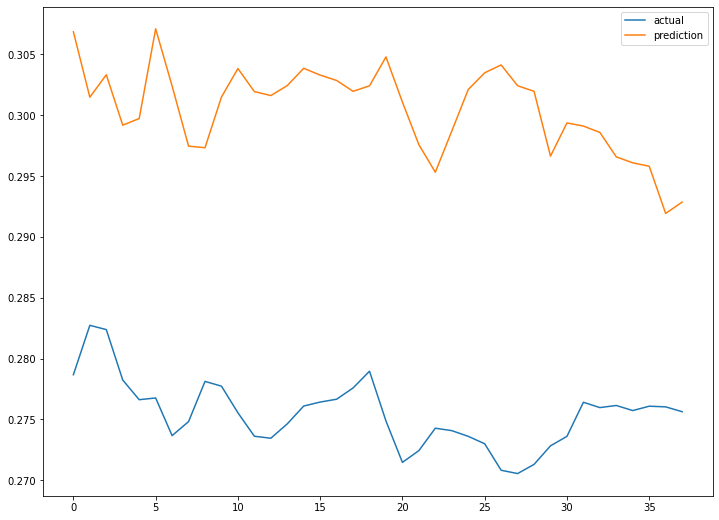

In [51]:
test = HT_accum20[:]
test_feature, test_label = make_dateset(test[feature_cols], test[label_cols],24)
a = model.evaluate(test_feature, test_label)
print(a)
pred = model.predict(test_feature)
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

41/41 [==============================] - 0s 291us/sample - loss: 0.0052 - mae: 0.0719
[0.0051879961634191075, 0.071893044]


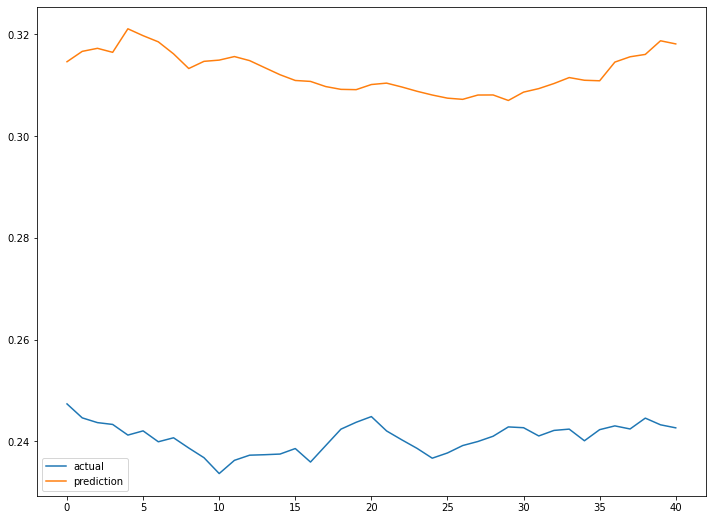

In [52]:
test = SK_accum20[:]
test_feature, test_label = make_dateset(test[feature_cols], test[label_cols],24)
a = model.evaluate(test_feature, test_label)
print(a)
pred = model.predict(test_feature)
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

40/40 [==============================] - 0s 274us/sample - loss: 3.2237e-04 - mae: 0.0171
[0.00032236555125564337, 0.017145168]


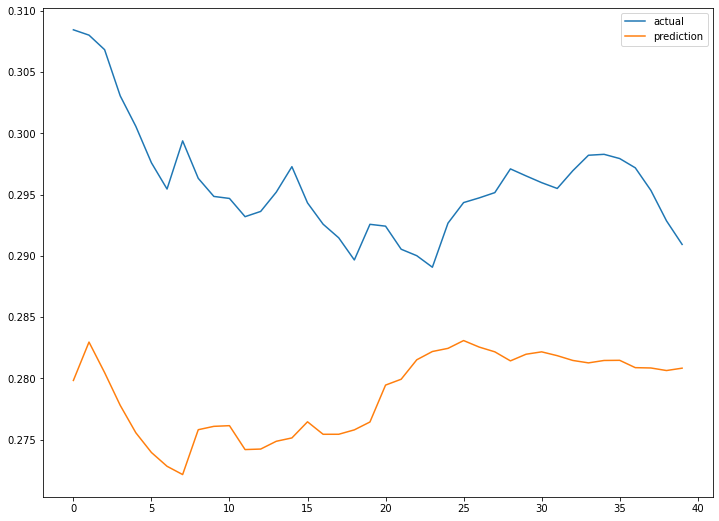

In [53]:
test = KT_accum20[:]
test_feature, test_label = make_dateset(test[feature_cols], test[label_cols],24)
a = model.evaluate(test_feature, test_label)
print(a)
pred = model.predict(test_feature)
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

42/42 [==============================] - 0s 237us/sample - loss: 1.6383e-04 - mae: 0.0121
[0.0001638268468446941, 0.012067576]


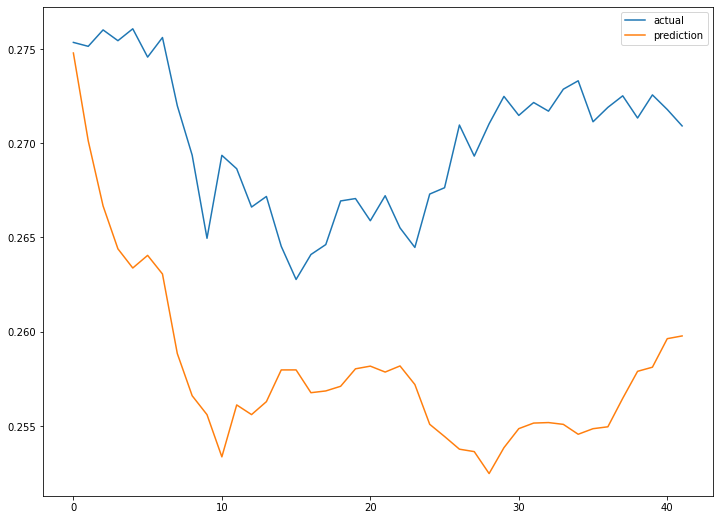

In [54]:
test = WO_accum20[:]
test_feature, test_label = make_dateset(test[feature_cols], test[label_cols],24)
a = model.evaluate(test_feature, test_label)
print(a)
pred = model.predict(test_feature)
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

38/38 [==============================] - 0s 262us/sample - loss: 7.7385e-05 - mae: 0.0080
[7.738474960206077e-05, 0.00796686]


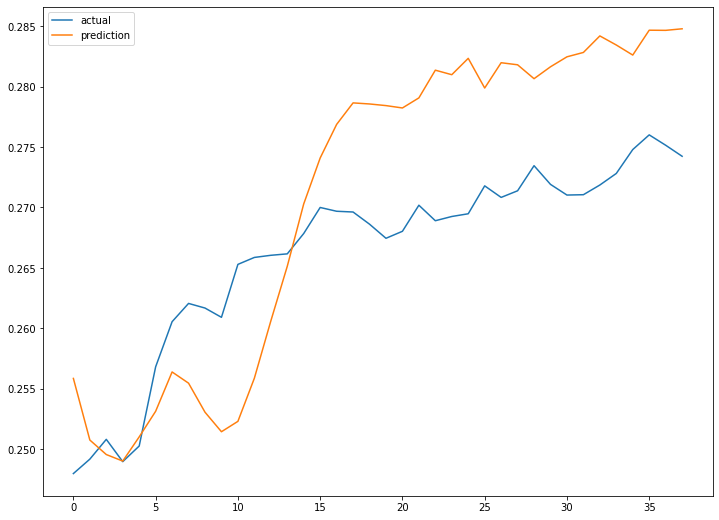

In [55]:
test = LT_accum20[:]
test_feature, test_label = make_dateset(test[feature_cols], test[label_cols],24)
a = model.evaluate(test_feature, test_label)
print(a)
pred = model.predict(test_feature)
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

41/41 [==============================] - 0s 243us/sample - loss: 5.7102e-04 - mae: 0.0197
[0.0005710155605035053, 0.019679178]


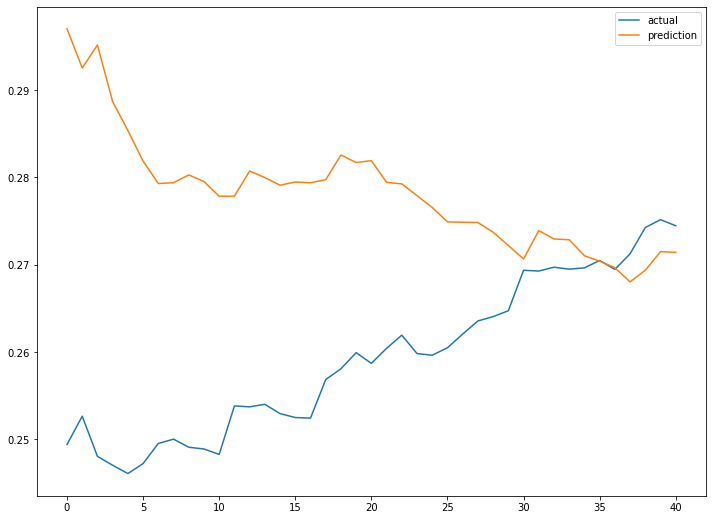

In [56]:
test = SS_accum20[:]
test_feature, test_label = make_dateset(test[feature_cols], test[label_cols],24)
a = model.evaluate(test_feature, test_label)
print(a)
pred = model.predict(test_feature)
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

40/40 [==============================] - 0s 250us/sample - loss: 2.7256e-04 - mae: 0.0161
[0.0002725621976424009, 0.016130472]


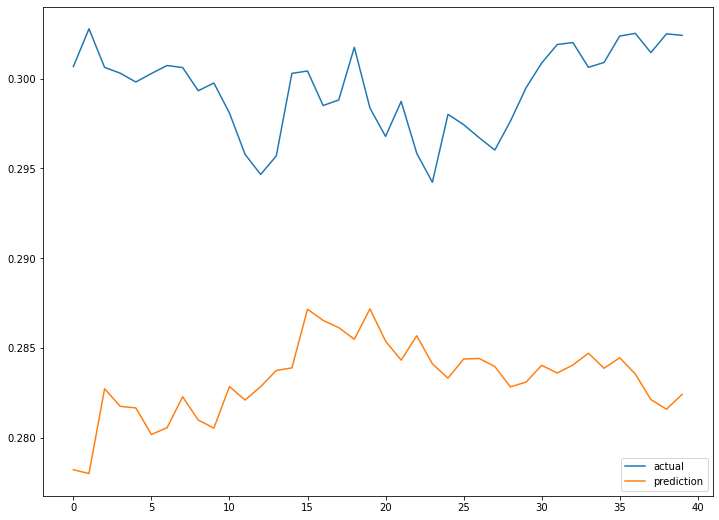

In [57]:
test = OB_accum20[:]
test_feature, test_label = make_dateset(test[feature_cols], test[label_cols],24)
a = model.evaluate(test_feature, test_label)
print(a)
pred = model.predict(test_feature)
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()